In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [4]:
url = '/content/drive/MyDrive/Colab Notebooks/bank-full.csv'
data = pd.read_csv(url, header=0, na_values='?', delimiter=';')
data.shape

(45211, 17)

In [5]:
data["job"] = data["job"].str.replace(".", "", regex=False)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
deposit_counts = data['y'].value_counts()
print(deposit_counts)

y
no     39922
yes     5289
Name: count, dtype: int64


In [8]:
mean_age = data["age"].mean()
std_age = data["age"].std()

In [9]:
mean_duration = data["duration"].mean()  # Среднее до нормализации
std_duration = data["duration"].std()

In [10]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print (categorical_columns)
print (numerical_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [11]:
for c in categorical_columns:
    print (data[c].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'failure' 'other' 'success']
['no' 'yes']


array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='balance', ylabel='age'>,
        <Axes: xlabel='day', ylabel='age'>,
        <Axes: xlabel='duration', ylabel='age'>,
        <Axes: xlabel='campaign', ylabel='age'>,
        <Axes: xlabel='pdays', ylabel='age'>,
        <Axes: xlabel='previous', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='balance'>,
        <Axes: xlabel='balance', ylabel='balance'>,
        <Axes: xlabel='day', ylabel='balance'>,
        <Axes: xlabel='duration', ylabel='balance'>,
        <Axes: xlabel='campaign', ylabel='balance'>,
        <Axes: xlabel='pdays', ylabel='balance'>,
        <Axes: xlabel='previous', ylabel='balance'>],
       [<Axes: xlabel='age', ylabel='day'>,
        <Axes: xlabel='balance', ylabel='day'>,
        <Axes: xlabel='day', ylabel='day'>,
        <Axes: xlabel='duration', ylabel='day'>,
        <Axes: xlabel='campaign', ylabel='day'>,
        <Axes: xlabel='pdays', ylabel='day'>,
        <Axes: xlabel='previous'

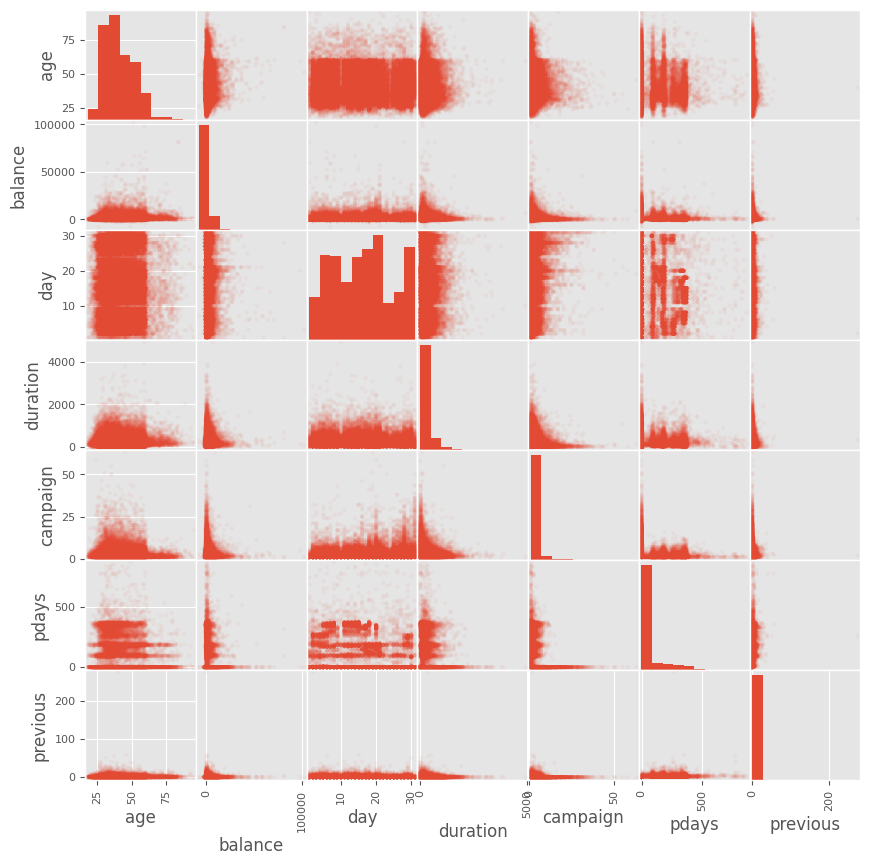

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.05, figsize=(10, 10))

In [13]:
data.select_dtypes(include=["number"]).corr()
"""Количество дней с момента предыдущего контакта
имеет более выраженную зависимость с количеством предыдущих контактов"""

'Количество дней с момента предыдущего контакта\nимеет более выраженную зависимость с количеством предыдущих контактов'

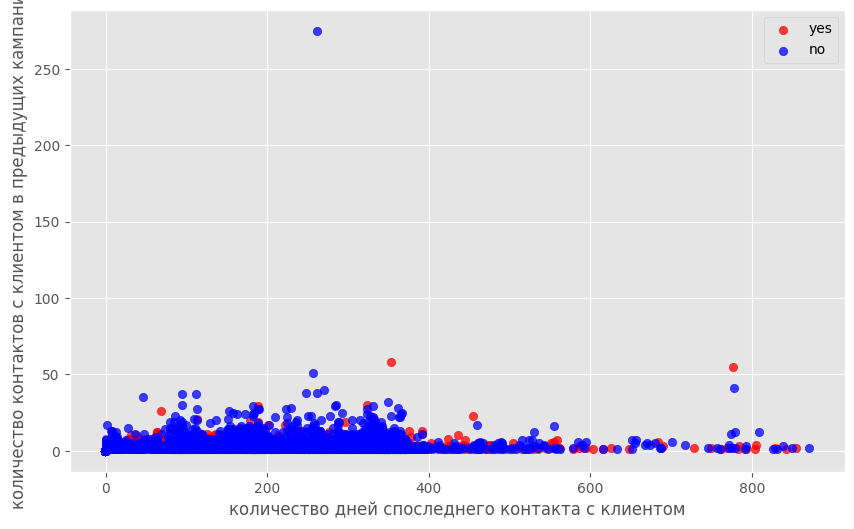

In [14]:
col1 = 'pdays'
col2 = 'previous'

plt.figure(figsize=(10, 6))

plt.scatter(data[col1][data['y'] == 'yes'],
            data[col2][data['y'] == 'yes'],
            alpha=0.75,
            color='red',
            label='yes')

plt.scatter(data[col1][data['y'] == 'no'],
            data[col2][data['y'] == 'no'],
            alpha=0.75,
            color='blue',
            label='no')

plt.xlabel('количество дней споследнего контакта с клиентом')
plt.ylabel('количество контактов с клиентом в предыдущих кампаниях')
plt.legend(loc='best');

In [15]:
#Выделим бинарные и небинарные признаки
data_describe = data.describe(include=[object])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print (binary_columns)
print (nonbinary_columns)

['default', 'housing', 'loan', 'y']
['job', 'marital', 'education', 'contact', 'month', 'poutcome']


In [16]:
#Значения бинарных признаков заменим на 0 и 1
for c in binary_columns:
        top = data_describe[c]['top']
        top_items = data[c] == top
        data.loc[top_items, c] = 0
        data.loc[np.logical_not(top_items), c] = 1

In [17]:
data[binary_columns].describe()

,default,housing,loan,y
count,45211,45211,45211,45211
unique,2,2,2,2
top,0,0,0,0
freq,44396,25130,37967,39922


In [18]:
#Метод векторизации
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print (data_nonbinary.columns)

Index(['job_admin', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')


In [19]:
#Нормализация данных
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04
mean,2.061959e-16,2.011667e-17,4.149063e-17,6.160730e-17,3.520417e-17,8.046667e-17,-2.011667e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.159970e+00,-3.081114e+00,-1.779088e+00,-1.002467e+00,-5.693443e-01,-4.114486e-01,-2.519376e-01
25%,-7.473762e-01,-4.237673e-01,-9.379923e-01,-6.025100e-01,-5.693443e-01,-4.114486e-01,-2.519376e-01
50%,-1.823386e-01,-3.002766e-01,2.326005e-02,-3.035132e-01,-2.465576e-01,-4.114486e-01,-2.519376e-01
75%,6.652178e-01,2.158719e-02,6.240428e-01,2.362344e-01,7.622910e-02,-4.114486e-01,-2.519376e-01
max,5.091346e+00,3.309441e+01,1.825608e+00,1.809450e+01,1.944343e+01,8.297339e+00,1.191347e+02


In [20]:
#Соединяем в одну таблицу
data = pd.concat((data_numerical, data[binary_columns], data_nonbinary), axis=1)
data = pd.DataFrame(data, dtype=float)
print (data.shape)
print (data.columns)

(45211, 49)
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'default', 'housing', 'loan', 'y', 'job_admin', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


In [21]:
X = data.drop(('y'), axis=1)  # Выбрасываем столбец 'deposit' из признаков.
y = data['y']  # Целевая переменная 'deposit'.
feature_names = X.columns

print(feature_names)
print (X.shape)
print (y.shape)
N, d = X.shape

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'default', 'housing', 'loan', 'job_admin', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')
(45211, 48)
(45211,)


In [22]:
#Разбиение данных на обучающую/тестовую выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape
print (N_train, N_test)
#X_train, y_train – это обучающая выборка, X_test, y_test – тестовая

31647 13564


In [23]:
#АЛГОРИТМ k-БЛИЖАЙШИХ СОСЕДЕЙ
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
#Ошибки выборок
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print (err_train, err_test)

0.07785888077858881 0.10424653494544382


In [25]:
#Перекрестный контроль
from sklearn.model_selection import GridSearchCV
n_neighbors_array = [1, 3, 5, 7, 10, 15]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print (best_cv_err, best_n_neighbors)

0.10007266633169076 15


In [26]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))
print (err_train, err_test)

0.09245742092457421 0.10159245060454143


In [27]:
#ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logreg = LogisticRegression(
    penalty='l2',
    C=1.0,
    fit_intercept=True,
    solver='lbfgs',
    max_iter=200,
    random_state=11
)

logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=11)

In [28]:
y_train_predict = logreg.predict(X_train)
y_test_predict = logreg.predict(X_test)

#Оценка ошибок
err_train = np.mean(y_train != logreg.predict(X_train))
err_test  = np.mean(y_test  != logreg.predict(X_test))

print (err_train, err_test)

0.09741839668846967 0.09938071365378945


In [29]:
#ДЕРЕВЬЯ РЕШЕНИЙ
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

tree = DecisionTreeClassifier(
    max_depth=11,
    max_features='sqrt',
    min_samples_leaf=3,
    criterion='entropy',
)

tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, max_features='sqrt',
                       min_samples_leaf=3)

In [30]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

#Оценка ошибки
err_train = np.mean(y_train != tree.predict(X_train))
err_test  = np.mean(y_test  != tree.predict(X_test))

print (err_train, err_test)

0.09580686952949727 0.1102182247124742


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Функция для вывода метрик и матрицы ошибок
def print_metrics(name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print(f"\n=== {name} ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")

# Вычисляем метрики для уже обученных моделей
print_metrics("k-ближайшие соседи", y_test, y_test_predict)
print_metrics("Логистическая регрессия", y_test, y_test_predict)
print_metrics("Деревья решений", y_test, y_test_pred)



=== k-ближайшие соседи ===
Accuracy: 0.9006
Precision: 0.6431
Recall: 0.3335
F1-score: 0.4393
ROC-AUC: 0.6545
Confusion Matrix:
[[11688   293]
 [ 1055   528]]

=== Логистическая регрессия ===
Accuracy: 0.9006
Precision: 0.6431
Recall: 0.3335
F1-score: 0.4393
ROC-AUC: 0.6545
Confusion Matrix:
[[11688   293]
 [ 1055   528]]

=== Деревья решений ===
Accuracy: 0.8898
Precision: 0.5577
Recall: 0.2685
F1-score: 0.3625
ROC-AUC: 0.6202
Confusion Matrix:
[[11644   337]
 [ 1158   425]]


In [32]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

data_over = RandomOverSampler(random_state=11)
X_over, y_over = data_over.fit_resample(X, y)

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.3, random_state=11)

In [33]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', n_neighbors=5, p=2, weights='uniform')
knn.fit(X_train_over, y_train_over)

# Прогнозы
y_train_predict_knn = knn.predict(X_train_over)
y_test_predict_knn = knn.predict(X_test_over)

# Ошибки
err_train_knn = np.mean(y_train_over != y_train_predict_knn)
err_test_knn = np.mean(y_test_over != y_test_predict_knn)

print(f"KNN Ошибка на обучающей выборке: {err_train_knn:.4f}")
print(f"KNN Ошибка на тестовой выборке: {err_test_knn:.4f}")


KNN Ошибка на обучающей выборке: 0.0619
KNN Ошибка на тестовой выборке: 0.0905


In [34]:
# Логистическая регрессия
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=11)
logreg.fit(X_train_over, y_train_over)

# Прогнозы
y_train_predict_logreg = logreg.predict(X_train_over)
y_test_predict_logreg = logreg.predict(X_test_over)

# Ошибки
err_train_logreg = np.mean(y_train_over != y_train_predict_logreg)
err_test_logreg = np.mean(y_test_over != y_test_predict_logreg)

print(f"Логистическая регрессия Ошибка на обучающей выборке: {err_train_logreg:.4f}")
print(f"Логистическая регрессия Ошибка на тестовой выборке: {err_test_logreg:.4f}")

Логистическая регрессия Ошибка на обучающей выборке: 0.1676
Логистическая регрессия Ошибка на тестовой выборке: 0.1642


In [35]:
# Деревья решений
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5, random_state=11)  # Пример использования max_depth
tree.fit(X_train_over, y_train_over)

# Прогнозы
y_train_predict_tree = tree.predict(X_train_over)
y_test_predict_tree = tree.predict(X_test_over)

# Ошибки
err_train_tree = np.mean(y_train_over != y_train_predict_tree)
err_test_tree = np.mean(y_test_over != y_test_predict_tree)

print(f"Деревья решений Ошибка на обучающей выборке: {err_train_tree:.4f}")
print(f"Деревья решений Ошибка на тестовой выборке: {err_test_tree:.4f}")

Деревья решений Ошибка на обучающей выборке: 0.1880
Деревья решений Ошибка на тестовой выборке: 0.1867


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Функция для вывода метрик и матрицы ошибок
def print_metrics(name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print(f"\n=== {name} ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")

# Вычисляем метрики для моделей после сэмплирования

# Для k-ближайших соседей (KNN)
print_metrics("k-ближайшие соседи", y_test_over, y_test_predict_knn)

# Для логистической регрессии
print_metrics("Логистическая регрессия", y_test_over, y_test_predict_logreg)

# Для деревьев решений
print_metrics("Деревья решений", y_test_over, y_test_predict_tree)


=== k-ближайшие соседи ===
Accuracy: 0.9095
Precision: 0.8622
Recall: 0.9730
F1-score: 0.9143
ROC-AUC: 0.9100
Confusion Matrix:
[[10226  1847]
 [  321 11560]]

=== Логистическая регрессия ===
Accuracy: 0.8358
Precision: 0.8410
Recall: 0.8248
F1-score: 0.8328
ROC-AUC: 0.8357
Confusion Matrix:
[[10220  1853]
 [ 2081  9800]]

=== Деревья решений ===
Accuracy: 0.8133
Precision: 0.8134
Recall: 0.8092
F1-score: 0.8113
ROC-AUC: 0.8133
Confusion Matrix:
[[9868 2205]
 [2267 9614]]


<ipython-input-38-d1ed4655b77b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yes.loc[:, "real_age"] = df_yes["age"] * std_age + mean_age


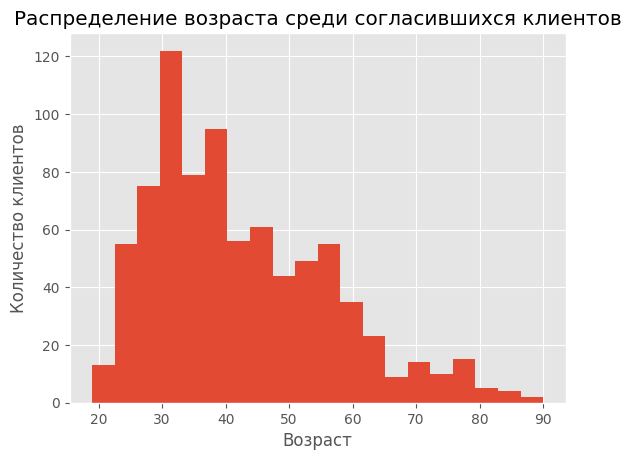

In [38]:
# Восстановление реального возраста
df_yes.loc[:, "real_age"] = df_yes["age"] * std_age + mean_age

# Построение гистограммы с реальными значениями
df_yes["real_age"].hist(bins=20)
plt.xlabel("Возраст")
plt.ylabel("Количество клиентов")
plt.title("Распределение возраста среди согласившихся клиентов")
plt.show()

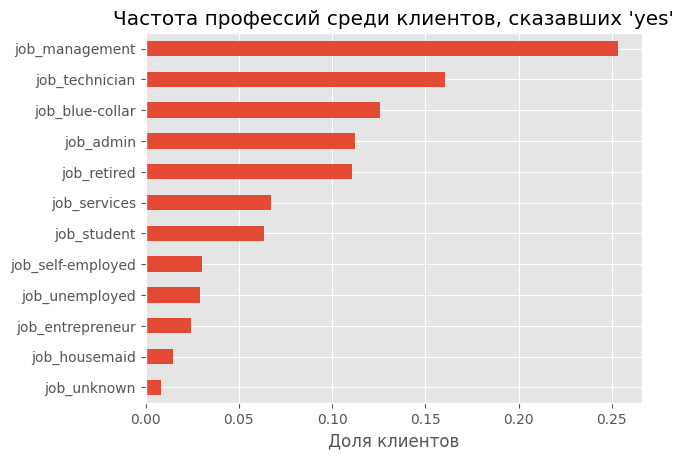

In [39]:
df_yes[[col for col in df_yes.columns if "job_" in col]].mean().sort_values().plot(kind='barh')
plt.xlabel("Доля клиентов")
plt.title("Частота профессий среди клиентов, сказавших 'yes'")
plt.show()

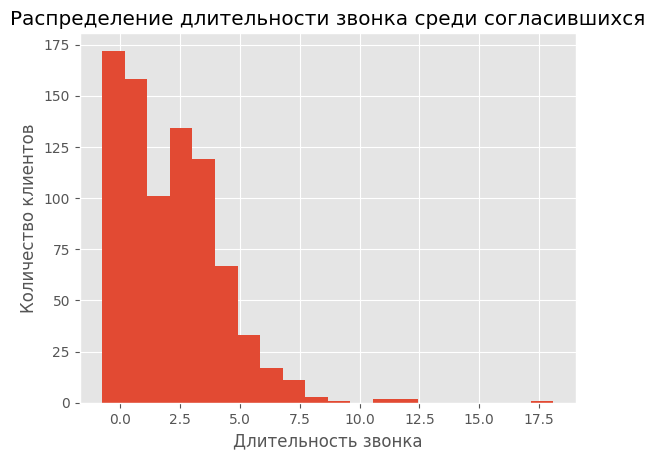

In [40]:
df_yes["duration"].hist(bins=20)
plt.xlabel("Длительность звонка")
plt.ylabel("Количество клиентов")
plt.title("Распределение длительности звонка среди согласившихся")
plt.show()